# Project - Analyze A/B Test Results 

This project will show and assure that I have mastered the subjects covered in the statistics lessons. The hope is to have this project be as comprehensive of these topics as possible. I have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.


For this project, I will be working along side quizzes to check the answers to ensure statistical numeric values and test are calculated correctly in many cases. Certain parts of the project will ask that I answer the quiz questions. Thus, all answers in this project are correct.

<a id='probability'></a>
## Part I - Probability

To get started, I imported required libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### 1.  
Now, I read in the `ab_data.csv` data. Store it in `df`. **Using the dataframe to answer the questions in Quiz 1 of the classroom.**


**a.** Read in the dataset from the `ab_data.csv` file to take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**c.** The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**d.** The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
line_up = len(df.query('group == "treatment" and landing_page != "new_page"')) + len(df.query('group != "treatment" and landing_page == "new_page"'))
line_up

3893

**f.** Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### 2.
For the rows where treatment is not aligned with new_page or control is not aligned with old_page, we cannot be sure if this row truly received the new or old page. Use Quiz 2 in the classroom to provide how we should handle these rows.

a. Now I used the answer to the quiz to create a new dataset that meets the specifications from the quiz. I stored the new dataframe in df2.

In [8]:
df2 = df.query("group == 'control' and landing_page == 'old_page'")
df2 = df2.append(df.query("group == 'treatment' and landing_page == 'new_page'"))

In [9]:
# Doubled Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### 3.

I used **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
#remove one of the duplicated rows
df2 = df2.drop(2893)

In [14]:
# optional check for dropped duplicate row
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


### 4.
I used **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
df2.query('group =="control"').converted.mean()

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#Divided the number of converted in treatment group by total number of users in treatment group
treatment_group = len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))
treatment_group

0.11880806551510564

**d.** What is the probability that an individual received the new page?

In [18]:
#Divided total users in new_page by the total users in df2
len(df2.query('landing_page == "new_page"'))/len(df2.landing_page)

0.5000619442226688

**e.** Based on the results from parts (a) through (d) above, is there any sufficient evidence to say that the new treatment page leads to more conversions?

**Answer:** The control group has a slightly higher number of persons who converted than the treatment group, based on the overall number of users who converted. The conversion rate in the control group is 12.04 percent, whereas it is 11.88 percent in the therapy group. Because the change is so minor, I don't feel there is a significant enough difference for a certain page to convert more visitors.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, I could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  

### 1.
For now, I would consider what I need to make the decision just based on all the data provided.  If I want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be? I can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:** Assuming that the old page is better unless the new page is demonstrably better, the null hypothesis is that the old page's mean converted rate is greater or equal to the new page's converted rate, and the alternative hypothesis is that the new page's mean converted rate is greater than the old page's converted rate.

Null Hypotheses: **$p_{old}$** is equal to or greater than **$p_{new}$** and Alternative Hypothesis: **$p_{old}$**  is less than **$p_{new}$**

###  2.
Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Using a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

I performed the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Using the cells below to provide the necessary parts of this simulation. I used **Quiz 5** in the classroom to make sure I was on the right track.<br><br>

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
#Mean of the converted in new page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
#Mean of the converted in old page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>


In [21]:
#Counting the total number of new page lands
n_new = len(df2.query('landing_page=="new_page"'))
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
#Counting the total number of old page lands
n_old = len(df2.query('landing_page=="old_page"'))
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [23]:
# randomly simulate new page landings using random.binomial and p_new
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted.mean()

0.12070057119262267

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# randomly simulate old page landings using random.binomial and p_old
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted.mean()

0.11962223109434586

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
 new_page_converted.mean() - old_page_converted.mean()

0.0010783400982768143


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Simulation via binomial distribution
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

**i. Histogram**<br> 

Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here. 

**Answer:**  We can see what we expect from the plotted histogram below. A normal distribution is resembled by the bell-shaped curve. This illustrates the Central Limit Theorm, which claims that when a population is large enough, the mean of all samples from the same population will be about equal to the population's mean.

Text(0, 0.5, 'Frequency/Count')

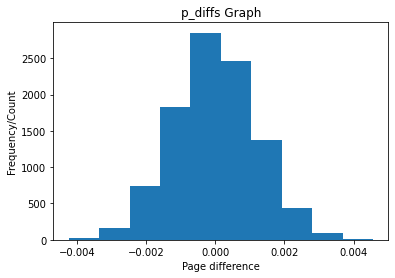

In [27]:
#Plotting an histogram for p_diffs 
p_diffs=np.array(p_diffs)

#histogram of p_diff
plt.hist(p_diffs)
plt.title('p_diffs Graph')
plt.xlabel('Page difference') 
plt.ylabel('Frequency/Count')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [28]:
# Actual observed differences in conversion, infered from ab_data.csv
act_diff = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
print(act_diff)
p_diffs = np.array(p_diffs)
(act_diff < p_diffs).mean()

-0.0015782389853555567


0.9035

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

**Answer:**  The real vs observed difference in means of converted old page and converted new page is what we computed. This suggests that the mean converted values for the observed difference, which is recorded in p diffs, were chosen at random. The actual difference was determined using the ab data.csv dataset. The p-value is the difference in means that we calculated. In this scenario, our p-value is above the threshold value of 0.05, so we can't rule out the null hypothesis; we can't assume the new page converts more users than the previous page.



**l.** We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.


In [29]:
#import necessary packages
import statsmodels.api as sm

# find the number of converted in old page and new page
n_new = len(df2.query('landing_page == "new_page"'))
n_old = len(df2.query('landing_page == "old_page"'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))

# show the variables we figured out above
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

In [30]:
#Computing z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old, n_new],alternative='smaller') 

#display z_score and p_value
print(z_score,p_value)

1.3109241984234394 0.9050583127590245


In [31]:
# import necessary packages
from scipy.stats import norm
# this tells us how significant our z-score is
norm.cdf(z_score)

0.9050583127590245

**m.** Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
# Calculating for the CI 
norm.ppf(1-(0.05))

1.6448536269514722

**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



**Answer:** The z-score at 1.311 is lesser than the critical value of 1.645 at 95 percent confidence interval hence the null hypothesis is not rejected. Which is the same result/conclusion in part j that we can't rule out the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** In this case, logistic regression was used. 

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
df2['intercept'] = 1
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,a_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [34]:
# initiated logistic regression model, fit it, and show the results
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 19 Jan 2022   Pseudo R-squ.:               8.077e-06
Time:                        15:19:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [35]:
# find the odds of converted
print(np.exp(0.0150))

1.015113064615719


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

**Summary:** When all other factors are held constant, the number of converted is 1.015 times higher than the number of non-converted. This indicates that both the old and new pages have the same likelihood of converting visitors. We must not presume that the new page is superior than the previous one.

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


**Answer:** p-value associated with ab_page is 0.19

The p-value was estimated in Part II, with the null hypothesis being that the new page would convert more than the old page, and the alternative hypothesis being that the old page would convert more than or equal to the new page. We used variables and a logistic regression model to calculate the p-value in Part III. The Logistic Regression performed here is a two-tailed t- test, whereas the computation done in Part II is a one-tailed test.

The null hypothesis was that the difference between the pages is zero, whereas the alternative hypothesis was that the difference equal or not zero.

H0: **$p_{new}$** − **$p_{old}$* =0 <br> <br>

H1: **$p_{new}$** − **$p_{old}$** ≠0



**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** Another aspect that influences whether or not someone converts is their age. In comparison to a child, who may prefer more graphics and a more casual tone, older users may desire more information on the sites. Confidence intervals will rise or decrease as more parameters are included to the regression model. 

**g.** Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

**Answer:** The user's location has no bearing on the conversion rate. This can be obtained by calculating each country's conversion rates. They're all essentially the same. The null hypothesis is not rejected.

In [36]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

df2 = df2.set_index('user_id').join(df_countries.set_index('user_id'))

In [37]:
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])

In [38]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept',  'CA', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 19 Jan 2022   Pseudo R-squ.:               1.521e-05
Time:                        15:19:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.314      0.000      -2.010      -1.983
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
==============================================================================
"""

**h.** Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

A summary of results, and my conclusions based on the result will be provided below.

In [39]:
df2['CA_page'] = df2['CA']*df2['ab_page']
df2['UK_page'] = df2['UK']*df2['ab_page']
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'CA', 'UK', 'ab_page','CA_page', 'UK_page']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 19 Jan 2022   Pseudo R-squ.:               3.482e-05
Time:                        15:19:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [40]:
np.exp(results.params)

intercept    0.137178
CA           0.982625
UK           0.994272
ab_page      0.979646
CA_page      0.954198
UK_page      1.031896
dtype: float64

**Summary:** We have an identical likelihood of the ab page converting people in each nation based on the odds ratio of the interaction between country and ab page. There are no significant p-values for any of the variables. As a result, the null hypothesis is not rejected and conclude that there is insufficient evidence to demonstrate that the country and  the new page does not convert more than the old page. 

## Conclusion
The results reveal that the new and old pages had roughly equal chances of converting users, based on the statistical tests we applied, the Z-test, logistic regression model, and real difference seen. The null hypothesis is not rejected. I advise the e-commerce business to preserve the old page. This will save time and cost. 